In [414]:
import pandas as pd
import numpy as np
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

In [467]:
data=pd.read_csv("C:\Users\SAI SUPRAJA M\Documents\GitHub\HomeValuePrediction\data\preprocessed_data.csv", low_memory=False)

In [468]:
data.head()

,lotsizesquarefeet,calculatedfinishedsquarefeet,bedroomcnt,bathroomcnt,regionidzip,garagecarcnt,poolcnt,AgeofHouse,buildingclasstypeid
0,-0.001201,-0.001201,4.0,4.0,0,0.0,0.0,67.0,0.0
1,-0.000301,-0.000301,3.0,2.5,1,2.0,0.0,3.0,0.0
2,-0.000412,-0.000412,4.0,3.0,2,2.0,0.0,3.0,0.0
3,-0.005995,-0.005995,5.0,3.5,3,1.0,0.0,57.0,0.0
4,-0.020725,-0.020725,2.0,2.0,3,2.0,0.0,37.0,0.0


In [469]:
sample = [-0.001201,-0.001201,4.0,4.0,0,0.0,0.0,67.0,0.0]

In [470]:
data_array = data.values
data_array

array([[-1.20113718e-03, -1.20113718e-03,  4.00000000e+00, ...,
         0.00000000e+00,  6.70000000e+01,  0.00000000e+00],
       [-3.01403603e-04, -3.01403603e-04,  3.00000000e+00, ...,
         0.00000000e+00,  3.00000000e+00,  0.00000000e+00],
       [-4.11524515e-04, -4.11524515e-04,  4.00000000e+00, ...,
         0.00000000e+00,  3.00000000e+00,  0.00000000e+00],
       ...,
       [-3.09119688e-04, -3.09119688e-04,  3.00000000e+00, ...,
         0.00000000e+00,  5.00000000e+00,  0.00000000e+00],
       [-3.34554189e-04, -3.34554189e-04,  4.00000000e+00, ...,
         0.00000000e+00,  4.00000000e+00,  0.00000000e+00],
       [-5.00973941e-04, -5.00973941e-04,  4.00000000e+00, ...,
         0.00000000e+00,  3.00000000e+00,  0.00000000e+00]])

In [471]:
data_class1 = pd.read_csv('data/class.csv')
data_class = data_class1.values
data_class

array([[-0.23480231],
       [-0.05079983],
       [-0.23501983],
       ...,
       [-0.78961251],
       [-0.10219221],
       [-0.32855121]])

In [472]:
from sklearn.model_selection import train_test_split
start = datetime.datetime.now()
X_train, X_test, y_train, y_test = train_test_split(data_array, data_class, test_size=0.2, random_state=1)

In [427]:
from sklearn import linear_model
start = datetime.datetime.now()
reg1 = linear_model.LinearRegression()
reg1.fit(X_train, y_train)
end = datetime.datetime.now()
print  "Time taken: ", end - start
predict = reg1.predict(X_test)
print "RMSE: ", sqrt(mean_squared_error(y_test, predict))

Time taken:  0:00:01.689000
RMSE:  0.290914831709


In [428]:
from sklearn import linear_model
start = datetime.datetime.now()
reg2 = linear_model.Ridge(alpha = 1000.0)
reg2.fit (X_train, y_train) 
end = datetime.datetime.now()
print  "Time taken: ", end - start
predict1 = reg2.predict(X_test)
print "RMSE: ", sqrt(mean_squared_error(y_test, predict1))

Time taken:  0:00:00.905000
RMSE:  0.290890206628


In [429]:
from sklearn import linear_model
start = datetime.datetime.now()
reg3 = linear_model.LassoLars(alpha=0.01)
reg3.fit (X_train, y_train) 
end = datetime.datetime.now()
print  "Time taken: ", end - start
predict1 = reg3.predict(X_test)
print "RMSE: ", sqrt(mean_squared_error(y_test, predict1))

Time taken:  0:00:00.646000
RMSE:  0.290792519129


In [430]:
from xgboost.sklearn import XGBRegressor
start = datetime.datetime.now()
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
end = datetime.datetime.now()
print  "Time taken: ", end - start
y_predict_xgb = xgb.predict(X_test)
print "RMSE: ", sqrt(mean_squared_error(y_test, y_predict_xgb))

Time taken:  0:00:02.511000
RMSE:  0.290544347787


In [442]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
lin = []
for train, test in kf.split(data_array, data_class):
    X_train = data_array[train]
    X_test = data_array[test]
    y_train = data_class[train]
    y_test = data_class[test]
    start = datetime.datetime.now()
    reg1 = linear_model.LinearRegression()
    reg1.fit(X_train, y_train)
    end = datetime.datetime.now()
    print  "Time taken for linear regression: ", end - start
    y_predict_xgb = reg1.predict(X_test)
    linReg =  sqrt(mean_squared_error(y_test, y_predict_xgb))
    lin.append(linReg)
    print "RMSE for linear regression: ", linReg
total = 0.00
for i in lin:
    total = total + float(i)
print "Avg RMSE: " ,total/len(lin)

Time taken for linear regression:  0:00:00.005000
RMSE for linear regression:  0.29180464532
Time taken for linear regression:  0:00:00.006000
RMSE for linear regression:  0.291798942943
Time taken for linear regression:  0:00:00.007000
RMSE for linear regression:  0.291185851815
Time taken for linear regression:  0:00:00.006000
RMSE for linear regression:  0.289881612424
Time taken for linear regression:  0:00:00.006000
RMSE for linear regression:  0.292058078916
Time taken for linear regression:  0:00:00.007000
RMSE for linear regression:  0.293383489708
Time taken for linear regression:  0:00:00.012000
RMSE for linear regression:  0.290735900984
Time taken for linear regression:  0:00:00.010000
RMSE for linear regression:  0.290419290322
Time taken for linear regression:  0:00:00.011000
RMSE for linear regression:  0.293499065671
Time taken for linear regression:  0:00:00.011000
RMSE for linear regression:  0.296731638578
Avg RMSE:  0.292149851668


In [444]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
rid = []
for train, test in kf.split(data_array, data_class):
    X_train = data_array[train]
    X_test = data_array[test]
    y_train = data_class[train]
    y_test = data_class[test]
    start = datetime.datetime.now()
    reg2 = linear_model.Ridge(alpha = 1000.0)
    reg2.fit (X_train, y_train) 
    end = datetime.datetime.now()
    print  "Time taken for Ridge Regression: ", end - start
    y_predict_xgb = reg2.predict(X_test)
    ridReg =  sqrt(mean_squared_error(y_test, y_predict_xgb))
    rid.append(ridReg)
    print "RMSE for Ridge Regression: ", ridReg
total = 0.00
for i in rid:
    total = total + float(i)
print "Avg RMSE: " ,total/len(rid)

Time taken for Ridge Regression:  0:00:00.005000
RMSE for Ridge Regression:  0.291780027367
Time taken for Ridge Regression:  0:00:00.002000
RMSE for Ridge Regression:  0.291773950517
Time taken for Ridge Regression:  0:00:00.005000
RMSE for Ridge Regression:  0.291141415223
Time taken for Ridge Regression:  0:00:00.007000
RMSE for Ridge Regression:  0.289867277651
Time taken for Ridge Regression:  0:00:00.008000
RMSE for Ridge Regression:  0.292055519116
Time taken for Ridge Regression:  0:00:00.006000
RMSE for Ridge Regression:  0.293325102229
Time taken for Ridge Regression:  0:00:00.009000
RMSE for Ridge Regression:  0.290688917922
Time taken for Ridge Regression:  0:00:00.006000
RMSE for Ridge Regression:  0.290362367551
Time taken for Ridge Regression:  0:00:00.006000
RMSE for Ridge Regression:  0.293474677653
Time taken for Ridge Regression:  0:00:00.008000
RMSE for Ridge Regression:  0.2967298505
Avg RMSE:  0.292119910573


In [445]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
lass = []
for train, test in kf.split(data_array, data_class):
    X_train = data_array[train]
    X_test = data_array[test]
    y_train = data_class[train]
    y_test = data_class[test]
    start = datetime.datetime.now()
    reg3 = linear_model.LassoLars(alpha=0.01)
    reg3.fit (X_train, y_train) 
    end = datetime.datetime.now()
    print  "Time taken for lasso lars: ", end - start
    y_predict_xgb = reg3.predict(X_test)
    lassoLars =  sqrt(mean_squared_error(y_test, y_predict_xgb))
    lass.append(lassoLars)
    print "RMSE for Lasso Lars: ", lassoLars
total = 0.00
for i in lass:
    total = total + float(i)
print "Avg RMSE: " ,total/len(lass)

Time taken for lasso lars:  0:00:00.468000
RMSE for Lasso Lars:  0.291913762526
Time taken for lasso lars:  0:00:00.005000
RMSE for Lasso Lars:  0.291632399535
Time taken for lasso lars:  0:00:00.007000
RMSE for Lasso Lars:  0.291169140066
Time taken for lasso lars:  0:00:00.008000
RMSE for Lasso Lars:  0.289793377892
Time taken for lasso lars:  0:00:00.011000
RMSE for Lasso Lars:  0.291907131525
Time taken for lasso lars:  0:00:00.011000
RMSE for Lasso Lars:  0.293430842693
Time taken for lasso lars:  0:00:00.007000
RMSE for Lasso Lars:  0.290308845782
Time taken for lasso lars:  0:00:00.002000
RMSE for Lasso Lars:  0.290428129126
Time taken for lasso lars:  0:00:00.012000
RMSE for Lasso Lars:  0.293555617841
Time taken for lasso lars:  0:00:00.014000
RMSE for Lasso Lars:  0.296800950864
Avg RMSE:  0.292094019785


In [448]:
# prices = np.asarray(prices)
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
xg = []
for train, test in kf.split(data_array, data_class):
    X_train = data_array[train]
    X_test = data_array[test]
    y_train = data_class[train]
    y_test = data_class[test]
    start = datetime.datetime.now()
    xgb = XGBRegressor()
    xgb.fit(X_train,y_train)
    end = datetime.datetime.now()
    print  "Time taken for XgBoost: ", end - start
    y_predict_xgb = xgb.predict(X_test)
    xgB =  sqrt(mean_squared_error(y_test, y_predict_xgb))
    xg.append(xgB)
    print "RMSE for XgBoost : ", xgB
total = 0.00
for i in xg:
    total = total + float(i)
print "Avg RMSE: " ,total/len(xg)

Time taken for XgBoost:  0:00:00.713000
RMSE for XgBoost :  0.291281886902
Time taken for XgBoost:  0:00:00.733000
RMSE for XgBoost :  0.291993744638
Time taken for XgBoost:  0:00:00.773000
RMSE for XgBoost :  0.290488978681
Time taken for XgBoost:  0:00:00.707000
RMSE for XgBoost :  0.289703514973
Time taken for XgBoost:  0:00:00.711000
RMSE for XgBoost :  0.291461921241
Time taken for XgBoost:  0:00:00.724000
RMSE for XgBoost :  0.292599572043
Time taken for XgBoost:  0:00:00.717000
RMSE for XgBoost :  0.290520466046
Time taken for XgBoost:  0:00:00.708000
RMSE for XgBoost :  0.29038728987
Time taken for XgBoost:  0:00:00.729000
RMSE for XgBoost :  0.293617406116
Time taken for XgBoost:  0:00:00.724000
RMSE for XgBoost :  0.296852194201
Avg RMSE:  0.291890697471


In [456]:
import matplotlib.pyplot as plt
def plot_function(score):
    plt.plot(range(len(score)),score)
    plt.xlabel('Iterations')
    plt.ylabel('RMSE')
    plt.show()

Linear Regression


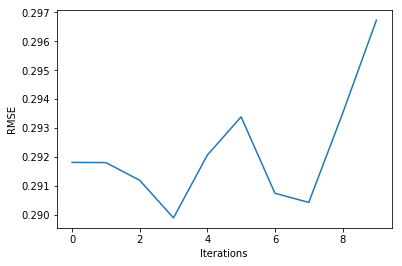

In [462]:
print "Linear Regression"
plot_function(lin)

Ridge Regression


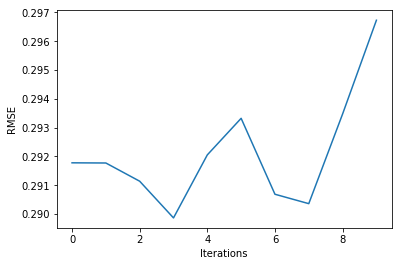

In [463]:
print "Ridge Regression"
plot_function(rid)

Lasso Regression


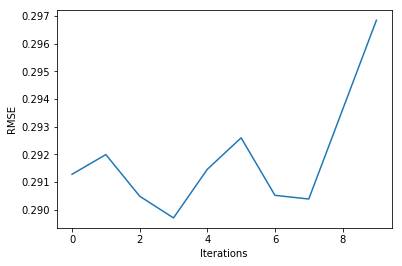

In [464]:
print "Lasso Regression"
plot_function(lass)

XgBoost Regression


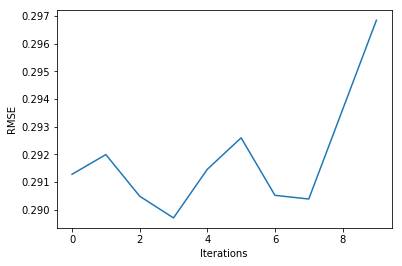

In [465]:
print "XgBoost Regression"
plot_function(xg)

In [466]:
import pickle
filename = 'xgboost.sav'
pickle.dump(xgb, open(filename, 'wb'))

In [345]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(sample)

In [346]:
result

array([-0.5340421], dtype=float32)

In [374]:
value = (-result*(1299963.0-900001.0))+900001.0
value

array([1113597.5], dtype=float32)

In [263]:
def reverse_transformation(value, min_value, max_value):
    return (value*(max_value-min_value)+min_value) 